### Solutions to Stochastic Dynamic Routing Problems using (Deep) Reinformecement Learning

Setup:

- Given a Graph G with Nodes V and Edges E.
- We want to find a tour through the graph that traverses all the nodes. We could for example imagine the nodes being customers and a truck that needs to deliver goods to them.
- The edge weights represent the costs of going from one node to another.
- Traverse all nodes of the graph while minimizing the total cost.

Assumptions:

- fully connected graph

In [5]:
import networkx as nx
import numpy as np
import pandas as pd
from gym import Env, spaces
import time
import random
import matplotlib.pyplot as plt
from networkx import approximation

In [6]:
# add a "fully connected option"
class Env():
    def __init__(self, n_nodes, random_starts=False, dropout=0):
        
        self.random_starts = random_starts
        self.observation_space = range(n_nodes)
        self.g = nx.complete_graph(self.observation_space)
        self.weight = dict(zip(self.g.edges(), np.random.randint(2,10, size=len(self.g.edges()))))
        
        
        
        self.player_pos = 0
        self.visited = [0]
        
        nx.set_edge_attributes(self.g, self.weight, "weight")
        
        # set the colors of all the nodes to blue by default
        nx.set_edge_attributes(self.g, dict(zip(self.g.edges(), [(51/255, 102/255, 255/255)] * len(self.g.edges()))), "on_tsp")
        
    def step(self, action):
        
        self.action_space -= {action}
        
        # query the right edge weight
        reward = self.weight[(min(self.player_pos, action), max(self.player_pos, action))]
        
        # update the player position and the states visited.
        self.player_pos = action
        self.visited.append(action)
        
        done = False
        if len(set(self.visited)) == len(self.observation_space):
            done = True
        
        # state, reward, done
        return self.player_pos, reward, done
      
        
    # function for plotting the best possible route.
    def plot(self, best_route=False):
        
        # for the tsp visualization
        tsp = approximation.traveling_salesman_problem
        tsp_trajectory = tsp(self.g, nodes=self.g.nodes(), weight="weight")
        color_list = []
        
        # make tuples in the form of (start, end) out of the tsp sequence
        for index, node in enumerate(tsp_trajectory[:-1]):
            color_list.append((node, tsp_trajectory[index+1]))
        
        # make a dictionary with the edges as keys and the color "r" as value.        
        zippy = dict(zip(color_list, [(179/255, 0, 0)] * len(color_list)))
        nx.set_edge_attributes(self.g, zippy, "on_tsp")
        
        # edges that are traversed during the tsp will be marked red.
        colors = nx.get_edge_attributes(self.g, "on_tsp").values()
        
        # draw the newtwork.
        pos = nx.circular_layout(self.g)
        nx.draw_networkx_edges(self.g, pos=pos, width=list(self.weight.values()), alpha=0.7, edge_color=colors)
        nx.draw_networkx_nodes(self.g, pos=pos)
        nx.draw_networkx_labels(self.g, pos=pos)
        
    # after the truck has visited all the nodes, step will return "done" and we reset the env.
    def reset(self):
        if self.random_starts:
            return np.random.choice(self.g.nodes())
        else:
            self.player_pos = 0
            self.visited = [0]
            self.action_space = set(self.observation_space) - {0}
            return self.player_pos, False

In [ ]:
env = Env(10)
epsilon = 0.1
lr = 0.03
n_epochs = 1000
disc_fact = 0.97
q_table = pd.DataFrame(np.zeros((len(env.observation_space),len(env.observation_space))))


for i in range(n_epochs):

    state, done = env.reset()
    while not done:
        
        action_space = env.action_space
        if np.random.rand() < epsilon:
            action = np.random.choice(np.array(list(env.action_space)))
        else:
            action = q_table.iloc[state][action_space].idxmax()
        
        new_state, reward, done = env.step(action)

        if not done:
                q_table.loc[state][action] = (1-lr) * q_table.loc[state][action] + lr * (reward + disc_fact * np.max(q_table[new_state]))
                
        state = new_state
        
    if i % 100 == 0:
        print(f"{i}th episode with {reward} reward")

In [86]:
q_table.head(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,37.575579,27.471952,5.447262,8.106919,7.520468,16.383160,23.679774,3.315514,15.396055
1,0.0,0.000000,161.449514,8.419100,17.426825,15.613487,23.636779,11.464502,3.640323,35.251970


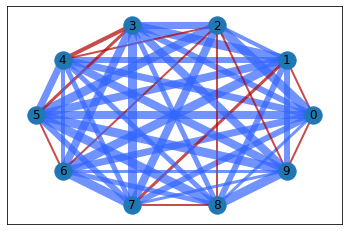

In [78]:
env.plot()

In [20]:
env.step(5)
env.action_space
env.reset()
env.action_space

{1, 2, 3, 4, 5, 6, 7, 8, 9}

In [3]:
class Agent():
    def __init__(self, alpha=0.01, gamma=1, epsilon=0.1, n_epochs=1000):
        
        self.env = Env()
        self.n_epochs = n_epochs
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
    
    def train():
        pass
    
    def results():
        pass

### Convert news to doc vectors and inegrate them into the routing problem. E.g. news about traffic or some adverse event shoudl be integrated into the routing decision.

### Convergance Rate:

### Scalability

### Multipartite for SC Modelling